Se registró cada usuario al que se le mostró la publicidad, y se pudo obtener datos de la persona tales como género, edad y salario estimado. Además se registró si el usuario luego compró el producto que la publicidad hacía referencia. Los datos están en Social_Network_Ads.csv. Se busca poder predecir dado un usuario con datos socioeconómicos si va a comprar o no el producto.

In [ ]:
"""
Este script permite realizar la implementación
de los modelos de clasificación KNN y regresión
logística sobre el set de datos.
"""

In [6]:
# Importa las librerias necesarias
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Carga la ruta al archivo de datos
ruta = os.path.dirname((os.path.abspath('models')))
ruta_datos = os.path.join(ruta, "dataset/Social_Network_Ads_procesados.csv")

# lectura del archivo a DataFrame
social_net = pd.read_csv(ruta_datos)

In [8]:
# Importa clases de separacion de datos y metricas
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [9]:
# Separa las variables predictoras de la variable a predecir.
X = social_net.loc[:, ["Gender_M", "Age", "EstimatedSalary"]].values
y = social_net.loc[:, "Purchased"].values

In [10]:
# Separacion los sets de entrenamoento y de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0, stratify=y)

In [11]:
# Estandarizacio de las caracteristicas
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

Clasificador KNN:

In [12]:
# Entrenamiento
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors=25, metric="minkowski", p=2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [13]:
# Predicciones
y_pred_knn  = classifier_knn.predict(X_test)

Clasificador Regresión Logística

In [14]:
# Entrenamiento
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(random_state = 0, class_weight="balanced")
model_logistic.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [15]:
# Predicciones
y_pred_reg = model_logistic.predict(X_test)

Performance del clasificador KNN:

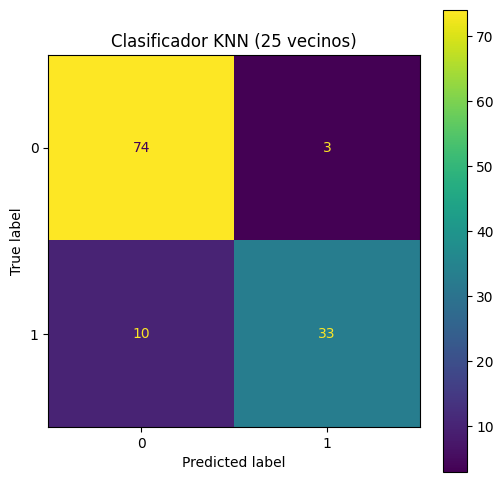

In [16]:
# Mariz de confusion
cm_knn = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=classifier_knn.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador KNN (25 vecinos)");

In [17]:
# Metricas
print("Clasificador KNN (25 vecinos)")
P = np.sum(cm_knn[1, :])
N = np.sum(cm_knn[0, :])
TP = cm_knn[1, 1]
TN = cm_knn[0, 0]
TPR = TP/P
TNR = TN/N
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred_knn, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred_knn, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred_knn, zero_division=0)}")

Clasificador KNN (25 vecinos)
Sensibilidad: 0.7674418604651163
Especificidad: 0.961038961038961
Exactitud balanceada: 0.8642404107520387
Precision: 0.9166666666666666
Recuperación: 0.7674418604651163
F1-score: 0.8354430379746836


Performance de la regresión logística:

In [18]:
# Matriz de confusion
cm_logistic = confusion_matrix(y_test, y_pred_reg)

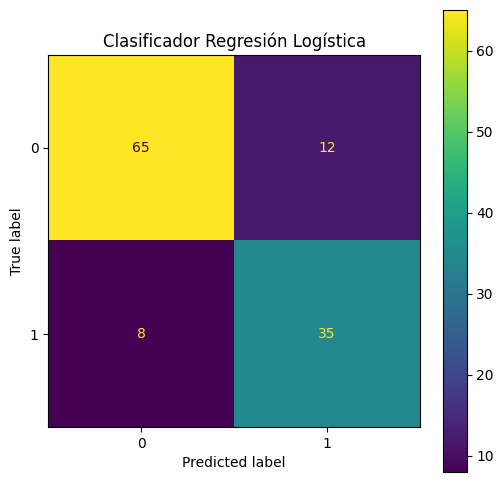

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic,
                              display_labels=model_logistic.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Regresión Logística");

In [21]:
# Metricas
print("Clasificador Regresión Logística")
P = np.sum(cm_logistic[1, :])
N = np.sum(cm_logistic[0, :])
TP = cm_logistic[1, 1]
TN = cm_logistic[0, 0]
TPR = TP/P
TNR = TN/N
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred_reg, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred_reg, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred_reg, zero_division=0)}")

Clasificador Regresión Logística
Sensibilidad: 0.813953488372093
Especificidad: 0.8441558441558441
Exactitud balanceada: 0.8290546662639686
Precision: 0.7446808510638298
Recuperación: 0.813953488372093
F1-score: 0.7777777777777778


Resumiendo:

| Métrica              | KNN   |R. Log. |
|----------------------|-------|--------|
| Sensibilidad         | 0.77  | 0.81   |
| Especificidad        | 0.96  | 0.84   | 
| Exactitud balanceada | 0.86  | 0.83   |
| Precisión            | 0.92  | 0.74   |
| Recuperación         | 0.77  | 0.81   |
| F1 - score           | 0.94  | 0.77   |

Observaciones: Por un lado la regresión logística predice mejor aquellos que compran lo publicado, mientras que el clasificador KNN predice mejor aquellos que resuelven no comprar lo publicado.

Para la regresión logística, se crea una curva ROC para evaluar la calidad del modelo, sin depender del valor umbral de probabilidad. Luego, con el valor umbral que se consideró más óptimo se vuelve a clasificar usando ese valor. Se evalúa cómo cambiaron las métricas.

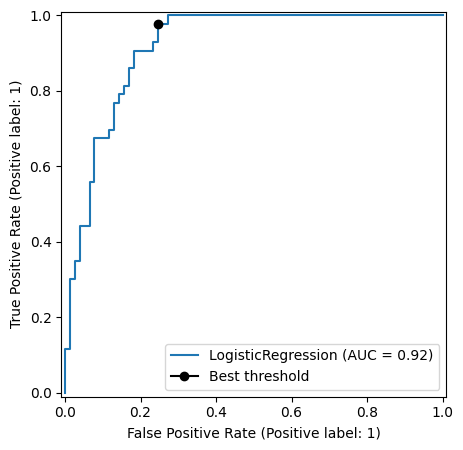

Best Threshold=0.373802


In [23]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Calcula la curva ROC

# Obtener las probabilidades de la clase positiva.
y_prob = model_logistic.predict_proba(X_test)[:, 1]
# Obtener los falsos positivos (fpr), verdaderos positivos (tpr) y los umbrales correspondientes.
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Encontrar el umbral optimo
# Calcula la metrica de Youden.
J = tpr - fpr
# Encuentrar el indice del umbral que maximiza J.
ix = np.argmax(J)
# Obtener el valor del umbral optimo.
best_threshold = thresholds[ix]

# Visualizar la curva ROC y el umbral optimo
fig, ax = plt.subplots(figsize=(5,5))
svc_disp = RocCurveDisplay.from_estimator(model_logistic, X_test, y_test, ax=ax)
ax.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best threshold')
plt.legend(loc="lower right")
plt.show()

print('Best Threshold=%f' % best_threshold)


In [24]:
# Aplicar el umbral optimo para hacer predicciones
y_pred_log_reg_new = (y_prob >= best_threshold).astype(int)

In [25]:
# Crea la matriz de confusión
cm_logistic_new = confusion_matrix(y_test, y_pred_log_reg_new)

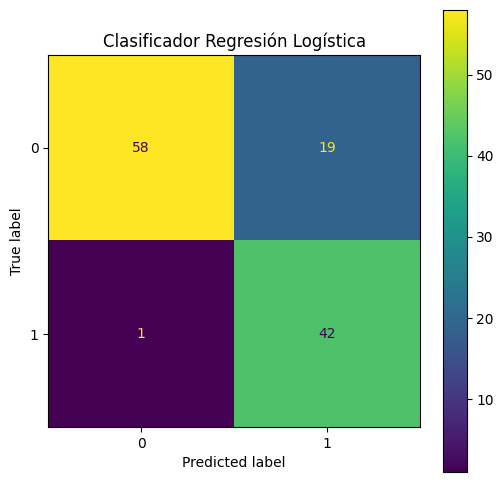

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_new,
                              display_labels=model_logistic.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Regresión Logística");

In [27]:
# Metricas
print("Clasificador Regresión Logística")
P = np.sum(cm_logistic_new[1, :])
N = np.sum(cm_logistic_new[0, :])
TP = cm_logistic[1, 1]
TN = cm_logistic[0, 0]
TPR = TP/P
TNR = TN/N
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")
print(f"Exactitud balanceada: {(TPR + TNR)/2}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg_new, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred_log_reg_new, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred_log_reg_new, zero_division=0)}")

Clasificador Regresión Logística
Sensibilidad: 0.813953488372093
Especificidad: 0.8441558441558441
Exactitud balanceada: 0.8290546662639686
Precision: 0.6885245901639344
Recuperación: 0.9767441860465116
F1-score: 0.8076923076923077


Resumiendo:

| Métrica              | R. Log. New   |R. Log. |
|----------------------|---------------|--------|
| Sensibilidad         | 0.81          | 0.81   |
| Especificidad        | 0.84          | 0.84   | 
| Exactitud balanceada | 0.83          | 0.83   |
| Precisión            | 0.69          | 0.74   |
| Recuperación         | 0.98          | 0.81   |
| F1 - score           | 0.81          | 0.77   |

Observaciones: Las diferencias se apreciaron en la precisión y recuperación. La regresión logística con el umbral optmizado permite que la proporción de casos de compra identificados correctamente por el clasificador con respecto a todos los casos que el clasificador etiquetó como de compra sea mayor. Por otro lado, la regresión logística original mide mejor la proporción de casos de compra que el clasificador identificó correctamente con respecto a todos los casos de compra reales en los datos.